# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

In [4]:
df_credit = pd.read_excel('GermanCredit.xlsx')
df_credit.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [10]:
df_credit.isnull().sum()

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

# 3. Plot Histogram for column 'CreditAmount'

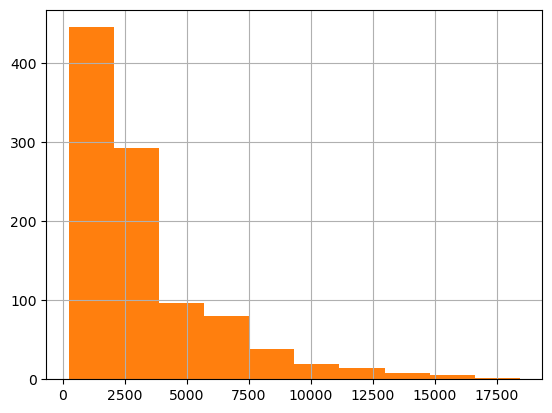

In [7]:
df_credit.CreditAmount.hist()
plt.show()

# 3b. Create creditability dataframe

In [84]:
df_1 = df_credit.loc[df_credit['Creditability']==1]

In [86]:
df_0 = df_credit.loc[df_credit['Creditability']==0]

In [85]:
df_1.value_counts()

Creditability  CreditAmount  DurationOfCreditInMonths
1              1262          12                          2
               701           12                          2
               1258          24                          2
               1374          6                           2
               1478          15                          2
                                                        ..
               1569          15                          1
               1572          21                          1
               1574          12                          1
               1577          11                          1
               15857         36                          1
Length: 693, dtype: int64

In [89]:
df_0.value_counts()

Creditability  CreditAmount  DurationOfCreditInMonths
0              433           6                           1
               4297          18                          1
               4280          30                          1
               4249          30                          1
               4241          24                          1
                                                        ..
               1778          15                          1
               1670          9                           1
               1659          24                          1
               1647          21                          1
               18424         48                          1
Length: 300, dtype: int64

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [96]:
cred = pd.concat([df_1,df_0],axis=1)
cred

,Creditability,CreditAmount,DurationOfCreditInMonths,Creditability,CreditAmount,DurationOfCreditInMonths
0,1.0,1049.0,18.0,NaN,NaN,NaN
1,1.0,2799.0,9.0,NaN,NaN,NaN
2,1.0,841.0,12.0,NaN,NaN,NaN
3,1.0,2122.0,12.0,NaN,NaN,NaN
4,1.0,2171.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,0.0,1987.0,24.0
996,NaN,NaN,NaN,0.0,2303.0,24.0
997,NaN,NaN,NaN,0.0,12680.0,21.0
998,NaN,NaN,NaN,0.0,6468.0,12.0


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

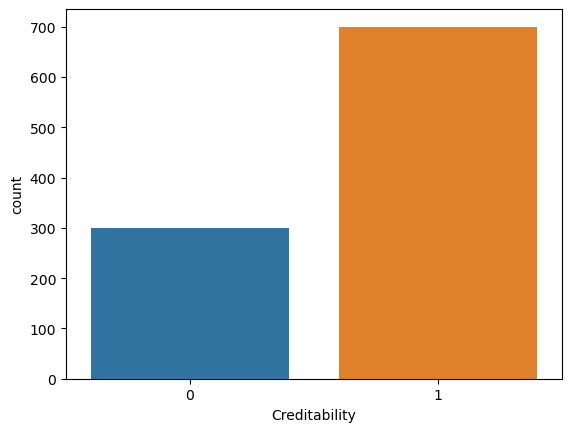

In [124]:
sns.countplot(df_credit['Creditability'])
plt.show()

# 6. Prepare input data for the model

In [106]:
X = df_credit.iloc[:,1:]
x_scaler = StandardScaler()
num_scaled = x_scaler.fit_transform(X)
X = pd.DataFrame(X,columns=X.columns)
Y = df_credit.iloc[:,0]

# 7. Fit logistic regression model

In [109]:
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=1)
logreg = LogisticRegression()
logreg_model = sm.Logit(y_train,X_train).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.591615
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                 0.03809
Time:                        18:10:42   Log-Likelihood:                -473.29
converged:                       True   LL-Null:                       -492.03
Covariance Type:            nonrobust   LLR p-value:                 7.259e-09
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6532      0.162     10.175      0.000       1.335

# 8. Test accuracy calculation

In [113]:
y_pred = logreg_model.predict(X_test)

y_class = [0 if x<np.mean(y_pred) else 1 for x in y_pred]

print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

           0       0.38      0.57      0.46        56
           1       0.79      0.64      0.71       144

    accuracy                           0.62       200
   macro avg       0.59      0.61      0.58       200
weighted avg       0.68      0.62      0.64       200



# 9. Build a confusion matrix

In [117]:
cm = confusion_matrix(y_test,y_class)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

total = TP+TN+FP+FN

print('Confusion matrix',cm)
print('Accuracy',(TP+TN)/total)
print('Sensitivity',TP/(TP+FN))
print('Specificity',TN/(TN+FP))

Confusion matrix [[32 24]
 [52 92]]
Accuracy 0.62
Sensitivity 0.6388888888888888
Specificity 0.5714285714285714


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

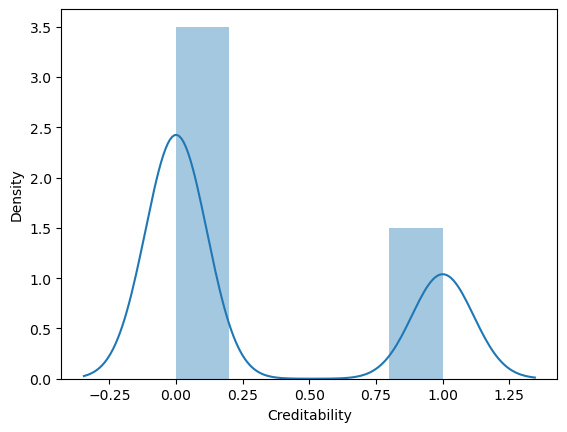

In [126]:
sns.distplot(df_credit['Creditability']==0)
plt.show()

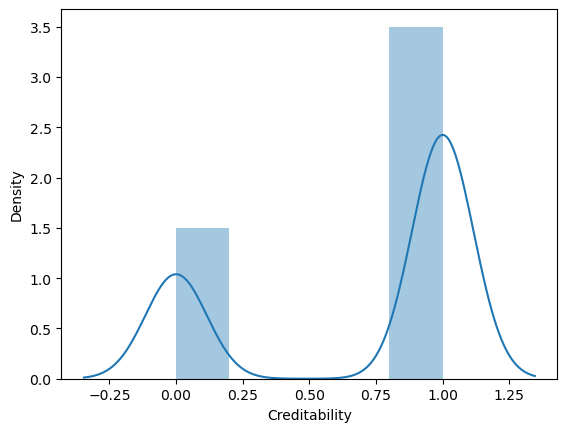

In [127]:
sns.distplot(df_credit['Creditability']==1)
plt.show()

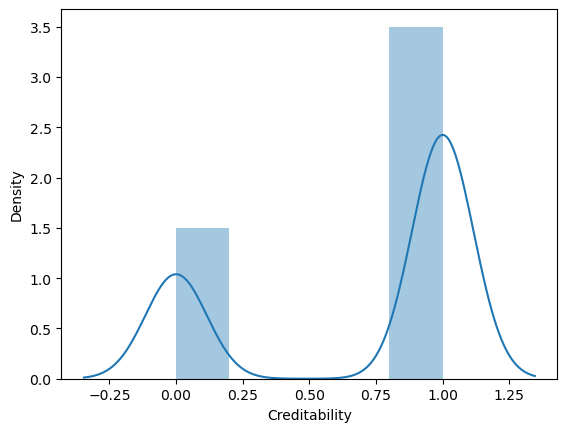

In [128]:
sns.distplot(df_credit['Creditability'])
plt.show()

The non-defaulters are more compared to the defaulters in the dataset

In [130]:
np.exp(logreg_model.params)

const                       5.223753
CreditAmount                0.999984
DurationOfCreditInMonths    0.965106
dtype: float64